<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/04_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Cross-Validation



Hasta ahora hemos visto que separábamos nuestro dataset en dos partes: los conjuntos de *training* y de *test*.
En el conjunto de training ajustábamos nuestro modelo y en el conjunto de test evaluábamos su capacida de generalizar, es decir evaluamos la capacidad predictiva del modelo en datos nuevos, nunca visto antes.



Sin embargo, esta no es siempre la mejor práctica ya que a veces es difícil obtener datos etiquetados: "*perder*" un 20, 25 o un 30 por ciento de los datos para el conjunto de test no siempre no es viable.
Una solución muy común para conseguir más datos de entrenamiento a la vez que evaluamos la capacidad de generalización es el método de **cross-validation**. Este método consiste en separar los datos repetidamente en diferentes conjuntos de test y training y construir un modelo para cada par test-train. Los scores de test se agregan para obtener una estimación más robusta del modelo.

La manera más común para hacer *cross-validation* es mediante el método **k-fold cross-validation**. Este método consiste en separar el dataset en `k` trozos (usualmente 5 o 10), y en cada iteración utilizar un fold distinto como datos de test. Esto se ve muy bien en la siguiente figura:





Este método asegura que todos los datos del dataset han sido utilizados para test en algún momento. 

Vamos a probar este método en el dataset de [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), utilizando KNN.

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()



Las etiquetas del dataset están ordenadas, así que si separamos el dataset, el primer fold sólo tendría etiquetas `y=0`, etc. hasta el último, que sólo tendría `y=2`

In [2]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X.shape

(150, 4)

In [5]:
X.size

600

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Sección nueva
Parece que las clases están ordenadas.

Para evitar este problema, primero hay que reordenar nuestros datos de manera aleatoria.

In [7]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]




Ahora, implementar *cross-validation* es muy fácil:

In [8]:
k = 10
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []
for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    # store the mask for visualization
    masks.append(test_mask)
    # create training and test sets using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    # fit the classifier
    classifier.fit(X_train, y_train)
    # compute the score and record it
    scores.append(classifier.score(X_test, y_test))



Vamos a ver como quedan los folds:

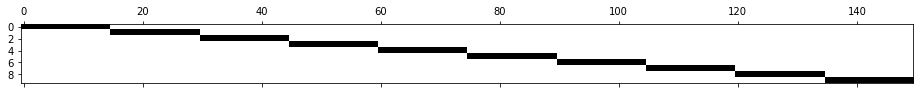

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks, cmap='gray_r')



Y ahora vamos a ver como quedan los scores:

In [10]:
print('All scores:', scores)
print('Mean score:', np.mean(scores))

All scores: [1.0, 1.0, 0.9333333333333333, 0.8, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333]
Mean score: 0.96




Como vemos hay un 10% de variación en los scores (del 90% al 100%), si hubiéramos utilizado un sólo split, no hubiéramos podido reflejar estas diferencias. Así, la media de los scores es una métrica mucho más robusta que una evaluación contra un sólo conjunto de datos.



Como imaginaremos, *scikit-learn* ya provee métodos para realizar cross-validaciones rápidamente y sin tener que escribir mucho código. Para ello disponemos del módulo **``sklearn.model_selection``** que provee de muchas funciones de utilidad para *cross-validation*. La función más sencilla es **``cross_val_score``** cuyos parámetros de entrada son un estimador y un dataset y cuya salida son los splits ya realizados:

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print('All scores:', scores)
print('Mean score:', np.mean(scores))

All scores: [1.         0.93333333 1.         1.         0.93333333]
Mean score: 0.9733333333333334




Por defecto **`cross_val_score`** hace 3 folds (`K=3`). Podemos cambiar el número de folds modificando el parámetro `cv`:

In [12]:
scores = cross_val_score(classifier, X, y, cv=10)
print('All scores:', scores)
print('Mean score:', np.mean(scores))

All scores: [1.         1.         0.93333333 0.86666667 1.         1.
 1.         1.         0.93333333 0.93333333]
Mean score: 0.9666666666666666




Existen también otros objetos en el módulo que nos generan las separaciones para todo tipo de métodos de cross-validación, incluyendo el k-fold:

In [13]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit



De manera predeterminada, **``cross_val_score``** usará **``StratifiedKFold``** para la clasificación, lo que garantiza que las proporciones de clase en el conjunto de datos se reflejen en cada fold. Si tiene un conjunto de datos de clasificación binaria con el 90% de los puntos de datos pertenecientes a la clase 0, eso significaría que en cada fold, el 90% de los puntos de datos pertenecerían a la clase 0.
Si solo usara la validación cruzada KFold, es probable que genere una división que solo contenga la clase 0.
En general, es una buena idea usar **``StratifiedKFold``** siempre que haga una clasificación.

Además, este objeto permite que no tengamos que barajar los datos del dataset de Iris.

In [14]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]




Notad que en cada fold hay unos pocos ejemplos del principio del dataset, unos cuantos de instancias de la mitad del dataset y otro grupo del final. 

Vamos a visualizar los splits:

In [15]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

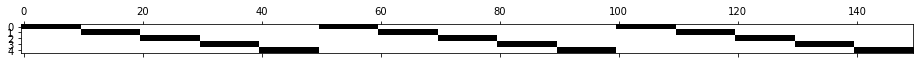

In [16]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)



Para comparar, vamos a ver como separa los folds el K-fold estándar:

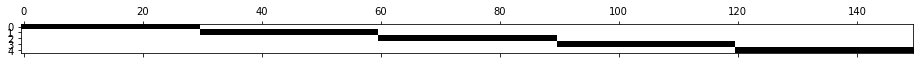

In [17]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)



Tened en cuenta que a mayor número de folds, tendremos un conjunto de entrenamiento más grande, pero también tendremos más repeticiones y, por tanto, una evaluación más lenta.

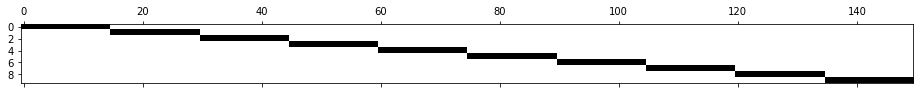

In [18]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)



Otro generador de cross-validaciones es el objeto ``ShuffleSplit``. Este generador separa el dataset en pequeñas porciones aleatorias permitiendo que el usuario pueda definir el número de repeticiones y el tamaño del test set independientemente:

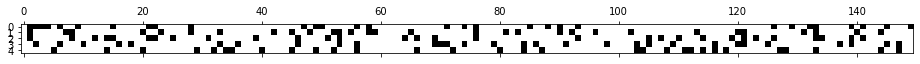

In [19]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)



Para una estimación más robusta, simplemente se aumenta el número de splits:

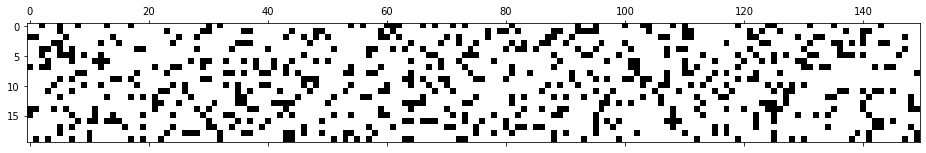

In [20]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

In [21]:
scores = []
for i in range(1,100):
  cv = ShuffleSplit(n_splits=i, test_size=.2)
  score = cross_val_score(classifier, X, y, cv=cv)
  scores.append(score)


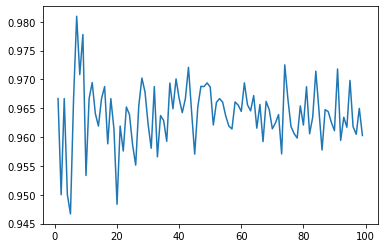

In [22]:
scores_mean = [score.mean() for score in scores]
splits = range(1,100)
plt.plot(splits,scores_mean)



Finalmente, podemos utilizar cualquiera de estos generadores de cross-validación con el método **`cross_val_score`**:

In [23]:
cv = ShuffleSplit(n_splits=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([0.9       , 1.        , 0.96666667, 0.96666667, 0.96666667])



# Ejercicios

## Ejercicio 1

- Utilizad una cross-validación con la clase ``KFold`` (K=3) en el dataset de Iris sin barajar los datos. ¿Podéis explicar el resultado?

In [24]:
# Respuesta aqui





## Ejercicio 2

Ahora haciendo los splits estratificando.

In [25]:
# Respuesta aqui


In [26]:
# Con shuffle
